# Content <a id='back'></a>

* [Objectives](#objectives)
* [1. Import Modul and Read Data](#import_modul)
    * [1.1 Import Modul](#import_modul)
    * [1.2 General Information](#general_information)
    * [1.3 Conclusion](#conclusion_1)
* [2. Data Preprocessing](#data_preprocessing)
    * [2.1 Merge the Data](#data_merge)
    * [2.2 Lower Case Column](#lower_case)
    * [2.3 Check Duplicate Values](#duplicate_values)
    * [2.4 Check Missing Values](#missing_values)
    * [2.5 Fix Data Types](#data_types)
    * [2.6 Add some features](#add_features)
* [3. Explore Data Analysis](#EDA)
    * [3.1 Analyze Interconnect Main Service](#analyze_mainservice)
    * [3.2 Analyze Total Charge From Exit User By Gender](#analyze_tcharge_gender)
    * [3.3 Analyze Total Charge From Exit By Month](#analyze_tcharge_month)
    * [3.4 Analyze Total Charges By Type, Payment Methode, Internet Service](#analyze_tcharge_all)
    * [3.5 EDA Conclusion](#eda_conclusion)
* [4. Features Engineering](#features_engineer)
* [5. Evaluation Procedure Engineering](#evaluate_procedure)
* [6. Define Target, Split Data and Scaller](#data_split)
* [7. Model Building](#model_building)
    * [7.1 Baseline Model](#baseline_model)
    * [7.2 Logistic Regression Model](#lr_model)
    * [7.3 Logistic Regression Model + Upsampling](#lr_model_upsampling)
    * [7.4 Logistic Regression Model + Downsampling](#lr_model_downsampling)
    * [7.5 Random Forest Classifier](#rf_classifier)
    * [7.6 XGBoost Classifier](#xgb_classifier)
    * [7.7 LGBM Classifier](#lgbm_classifier)
    * [7.8 Catboost Classifier](#gcatboost_classifier)
* [8. Model Summary](#model_summary)
* [9. General Conclusion](#general_conclusion)


# Objectives <a id='objectives'></a>

# Explanation of Main Tasks

A telecommunications operator named Interconnect wants to forecast their clients' *churn* rate. 󠀢 󠀳 󠀰 Interconnect's marketing team has collected some personal data from clients, including information about selected data plans and their contracts.

* Interconnect Service

󠀰Interconnect provides two main types of services:

1. The landline network.
2. The Internet.

Some of the other services that Interconnect provides include:

- Internet security: antivirus software (*DeviceProtection*) and malicious website blocker (*OnlineSecurity*)
- Dedicated technical support line (*TechSupport*)
- *cloud* storage for *file* and *backup* data (*OnlineBackup*)
- *Streaming* TV (*StreamingTV*) and movie directories (*StreamingMovies*)


Clients can choose to pay monthly or sign a contract for a 1 or 2 year subscription.

* Data Description

󠀰The available data consists of several *files* obtained from different sources:

- `contract.csv` — 󠀰contract information
- `personal.csv` — 󠀰client personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about phone services

In each *file* you will find a `customerID` column with a unique code assigned to each client.

Contract information applies as of February 1, 2020.

We also have to find auc_roc with the following scoring criteria.

Assessment criteria:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

In order to achieve the above objectives, we will follow the following steps :

- Import modul and read the data
- Apply Data Preprocession (check duplicate values, missing values, fix data types)
- Apply exploratory data analysis in determining why and what causes customer churn
- Build a machine learning model to forecast Interconnect customer churn

# 1. Import Modul and Read Data <a id='import_modul'></a>

# 1.1 Import Modul

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import modules for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import pipeline
from sklearn.pipeline import Pipeline

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# import optuna for hyperparameter tuning
import optuna
from optuna.samplers import TPESampler

# import metrics for sanity check on model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# import sklearn utilities
from sklearn.utils import shuffle

In [4]:
# create path for data
#path1 = "/content/drive/MyDrive/Final Project Practicum/personal.csv"
#path2 = "/content/drive/MyDrive/Final Project Practicum/phone.csv"
#path3 = "/content/drive/MyDrive/Final Project Practicum/internet.csv"
#path4 = "/content/drive/MyDrive/Final Project Practicum/contract.csv"


path1 = "/datasets/final_provider/personal.csv"
path2 = "/datasets/final_provider/phone.csv"
path3 = "/datasets/final_provider/internet.csv"
path4 = "/datasets/final_provider/contract.csv"

In [5]:
# read data
df_personal = pd.read_csv(path1)
df_phone = pd.read_csv(path2)
df_internet = pd.read_csv(path3)
df_contract = pd.read_csv(path4)

# 1.2 General Information <a id='general_information'></a>

In [6]:
# check data personal
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
# check data phone
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [8]:
# check data internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
# check data contract
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
#check duplicated
df_personal.duplicated().sum(), df_phone.duplicated().sum(), df_internet.duplicated().sum(), df_contract.duplicated().sum()

(0, 0, 0, 0)

In [11]:
# sample df_personal
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
# # sample df_phone
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
# sample df_internet
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [14]:
# sample df_contract
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


# 1.3 Conclusion <a id='conclusion_1'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
- df_personal has 7043 rows and 5 columns with no missing values and no duplicated values
- df_phone has 6361 rows and 2 columns with no missing values and no duplicated values
- df_internet has 5517 rows and 8 columns with no missing values and no duplicated values
- df_contract has 7043 rows and 8 columns with no missing values and no duplicated values

The next step is to do data preprocessing. We have to combine the four data. Removes duplicate values ​​if any, fills in missing values ​​if any, and fixes the data type.
     
</div>

# 2. Data Preprocessing <a id='data_preprocessing'></a>

# 2.1 Merge the Data <a id='data_merge'></a>

In [15]:
# merge data
merge_df = pd.merge(df_contract, df_internet, on="customerID", how='outer')
merge_df1 = pd.merge(merge_df, df_personal, on="customerID", how='outer')
merge_df2 = pd.merge(merge_df1, df_phone, on="customerID", how='outer')

# 2.2 Lower Case Column <a id='lower_case'></a>

In [16]:
# change to lowercase column
columns = []
for name in merge_df2.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

In [17]:
merge_df2.columns = columns

In [18]:
df_merge = merge_df2.rename(columns = {'ustomer_i_d':'customer_id', 'ender':'gender', 'streaming_t_v':'streaming_tv'})

# 2.3 Check Duplicate Values <a id='duplicate_values'></a>

In [19]:
df_merge.duplicated().sum()

0

# 2.4 Check Missing Values <a id='missing_values'></a>

In [20]:
df_merge.isnull().sum().sort_values(ascending=False) / df_merge.shape[0] * 100

online_backup        21.666903
internet_service     21.666903
streaming_movies     21.666903
streaming_tv         21.666903
tech_support         21.666903
device_protection    21.666903
online_security      21.666903
multiple_lines        9.683374
total_charges         0.000000
monthly_charges       0.000000
begin_date            0.000000
payment_method        0.000000
paperless_billing     0.000000
type                  0.000000
end_date              0.000000
gender                0.000000
senior_citizen        0.000000
partner               0.000000
dependents            0.000000
customer_id           0.000000
dtype: float64

In [21]:
for column in df_merge.columns:
    num_unique_values = len(df_merge[column].unique())
    print(f"{column}: {num_unique_values} unique values")

customer_id: 7043 unique values
begin_date: 77 unique values
end_date: 5 unique values
type: 3 unique values
paperless_billing: 2 unique values
payment_method: 4 unique values
monthly_charges: 1585 unique values
total_charges: 6531 unique values
internet_service: 3 unique values
online_security: 3 unique values
online_backup: 3 unique values
device_protection: 3 unique values
tech_support: 3 unique values
streaming_tv: 3 unique values
streaming_movies: 3 unique values
gender: 2 unique values
senior_citizen: 2 unique values
partner: 2 unique values
dependents: 2 unique values
multiple_lines: 3 unique values


In [22]:
# check unique value for binary function
group_unique = df_merge[['type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines']]
for column in group_unique.columns:
    unique_values = group_unique[column].unique()
    print(f"{column}: {unique_values} ")

type: ['Month-to-month' 'One year' 'Two year'] 
paperless_billing: ['Yes' 'No'] 
payment_method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
internet_service: ['DSL' 'Fiber optic' nan] 
online_security: ['No' 'Yes' nan] 
online_backup: ['Yes' 'No' nan] 
device_protection: ['No' 'Yes' nan] 
tech_support: ['No' 'Yes' nan] 
streaming_tv: ['No' 'Yes' nan] 
streaming_movies: ['No' 'Yes' nan] 
gender: ['Female' 'Male'] 
senior_citizen: [0 1] 
partner: ['Yes' 'No'] 
dependents: ['No' 'Yes'] 
multiple_lines: [nan 'No' 'Yes'] 


In [23]:
# we will replace the missing value column with "No" because there are only 2 choices, yes and no
df_merge = df_merge.fillna('No')

In [24]:
#df_merge.isnull().sum().sort_values(ascending=False) / df_merge.shape[0] * 100

In [25]:
# funcion convert to binary
def get_binary(row):
    if row == 'No':
        return 0
    else:
        return 1

In [26]:
df_merge['paperless_billing'] = df_merge['paperless_billing'].apply(get_binary)
df_merge['online_security'] = df_merge['online_security'].apply(get_binary)
df_merge['online_backup'] = df_merge['online_backup'].apply(get_binary)
df_merge['device_protection'] = df_merge['device_protection'].apply(get_binary)
df_merge['tech_support'] = df_merge['tech_support'].apply(get_binary)
df_merge['streaming_tv'] = df_merge['streaming_tv'].apply(get_binary)
df_merge['streaming_movies'] = df_merge['streaming_movies'].apply(get_binary)
df_merge['partner'] = df_merge['partner'].apply(get_binary)
df_merge['dependents'] = df_merge['dependents'].apply(get_binary)
df_merge['multiple_lines'] = df_merge['multiple_lines'].apply(get_binary)

In [27]:
# check unique value for binary function
group_unique = df_merge[['type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines']]
for column in group_unique.columns:
    unique_values = group_unique[column].unique()
    print(f"{column}: {unique_values} ")

type: ['Month-to-month' 'One year' 'Two year'] 
paperless_billing: [1 0] 
payment_method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
internet_service: ['DSL' 'Fiber optic' 'No'] 
online_security: [0 1] 
online_backup: [1 0] 
device_protection: [0 1] 
tech_support: [0 1] 
streaming_tv: [0 1] 
streaming_movies: [0 1] 
gender: ['Female' 'Male'] 
senior_citizen: [0 1] 
partner: [1 0] 
dependents: [0 1] 
multiple_lines: [0 1] 


# 2.5 Fix Data Types <a id='data_types'></a>

In [28]:
# change begin_date type
df_merge['begin_date'] = pd.to_datetime(df_merge['begin_date'])

In [29]:
# add end_date_binary column type
df_merge['end_date_binary'] = df_merge['end_date'].apply(get_binary)

In [30]:
# change monhtly_charges type
df_merge['monthly_charges'] = df_merge['monthly_charges'].astype('float')

In [31]:
# change monhtly_charges type
df_merge.loc[df_merge['total_charges'].isin([' ']),'total_charges'] = 0
df_merge['total_charges'] = df_merge['total_charges'].astype('float')

In [32]:
# change end_date type
df_merge['end_date'] = df_merge['end_date'].replace('No', np.nan)

In [33]:
df_merge['end_date'] = pd.to_datetime(df_merge['end_date'], format='%Y-%m-%d')

# 2.6 Add some features <a id='add_features'></a>

In [34]:
# add end_date_month
df_merge['end_date_month'] = df_merge['end_date'].dt.month.astype('str')

In [35]:
# add end_date year
df_merge['end_date_year'] = df_merge['end_date'].dt.year.astype('str')

In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   internet_service   7043 non-null   object        
 9   online_security    7043 non-null   int64         
 10  online_backup      7043 non-null   int64         
 11  device_protection  7043 non-null   int64         
 12  tech_support       7043 non-null   int64         
 13  streaming_tv       7043 non-null   int64         
 14  streamin

In [37]:
df_merge.describe()

,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,end_date_binary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.592219,64.761692,2279.734304,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.162147,0.483033,0.299588,0.421837,0.265370
std,0.491457,30.090047,2266.794470,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.368612,0.499748,0.458110,0.493888,0.441561
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Explore Data Analysis <a id='EDA'></a>

# 3.1 Analyze Interconnect Main Service <a id='analyze_mainservice'></a>

In [38]:
# General Distribution End Date Customer by Interconnect Main Service
agg_churn_mainservice = df_merge.groupby(['end_date_binary', ]).agg({'multiple_lines' : 'count', 'internet_service' : 'count'}).sort_values('end_date_binary').reset_index()
agg_churn_mainservice

,end_date_binary,multiple_lines,internet_service
0,0,5174,5174
1,1,1869,1869


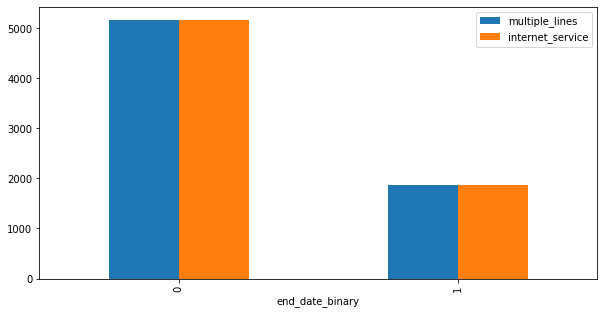

In [39]:
agg_churn_mainservice.plot(kind='bar', x='end_date_binary', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

The bar graph show the distribution for customers based on the main service is the same. And more customers are staying than are not staying.

</div>

In [40]:
pivot_tcharge_mainservice = df_merge.pivot_table(index='internet_service', values=['total_charges'], aggfunc='mean').sort_values('total_charges', ascending=False).reset_index()
pivot_tcharge_mainservice

,internet_service,total_charges
0,Fiber optic,3205.304570
1,DSL,2115.411338
2,No,662.604784


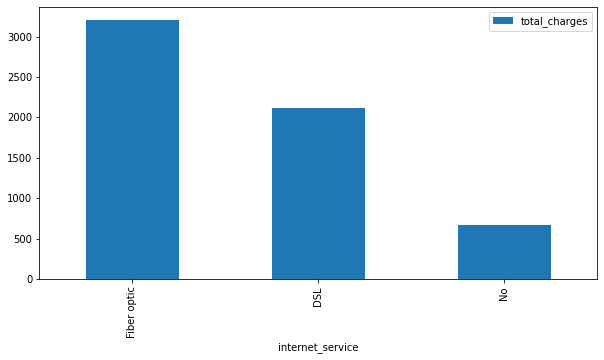

In [41]:
pivot_tcharge_mainservice.plot(kind='bar', x='internet_service', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Internet Service with Fiber Optic has the most total charge among the others
</div>

# 3.2 Analyze Total Charge From Exit User By Gender <a id='analyze_tcharge_gender'></a>

In [42]:
df_active_user = df_merge.loc[df_merge['end_date_binary'] == 0]
df_exit_user = df_merge.loc[df_merge['end_date_binary'] == 1]

In [43]:
pivot_tcharge_gender = df_exit_user.pivot_table(index=['gender'], values=['total_charges'], aggfunc='mean').sort_values('total_charges', ascending=False).reset_index()
pivot_tcharge_gender

,gender,total_charges
0,Male,1623.491559
1,Female,1440.979499


In [44]:
pivot_tcharge_test = df_active_user.pivot_table(index=['gender'], values=['total_charges'], aggfunc='mean').sort_values('total_charges', ascending=False).reset_index()
pivot_tcharge_test

,gender,total_charges
0,Female,2588.966046
1,Male,2511.987562


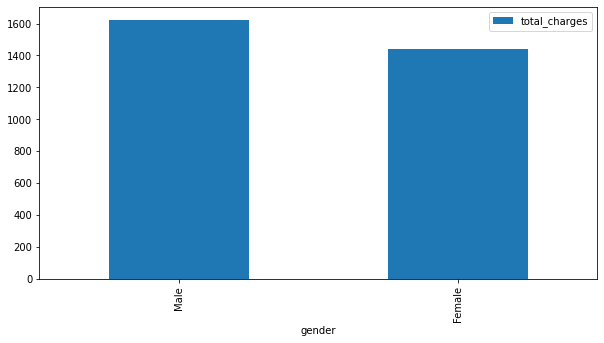

In [45]:
pivot_tcharge_gender.plot(kind='bar', x='gender', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
The total charge from user exits with male gender is more than female gender
</div>

# 3.3 Analyze Total Charge From Exit By Month <a id='analyze_tcharge_month'></a>

In [46]:
pivot_tcharge_month = df_exit_user.pivot_table(index=['end_date_month'], values=['total_charges'], aggfunc='mean').sort_values('total_charges', ascending=False).reset_index()
pivot_tcharge_month

,end_date_month,total_charges
0,10.0,1619.448035
1,12.0,1584.518348
2,1.0,1487.655109
3,11.0,1440.232577


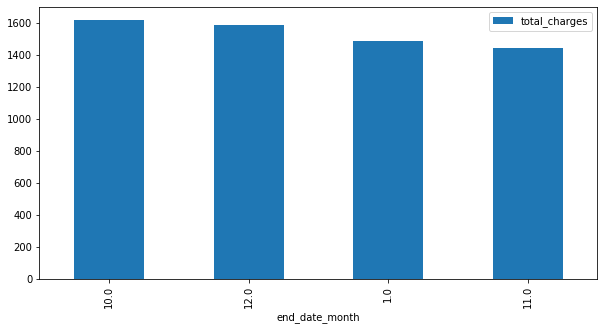

In [47]:
pivot_tcharge_month.plot(kind='bar', x='end_date_month', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
 
     
The total charge from user exits in october and december is more than in other months     
</div>

# 3.4 Analyze Total Charges By Type, Payment Methode, Internet Service <a id='analyze_tcharge_all'></a>

In [48]:
agg_exit_count = df_exit_user.groupby(['type', 'payment_method', 'internet_service']).agg({
    'end_date_binary' : 'count', 'monthly_charges' : 'mean', 'total_charges' : 'mean'}).sort_values('end_date_binary', ascending=False).reset_index().rename(columns={
        'end_date_binary' : 'exit_count', 'monthly_charges' : 'mean_monthly_charges', 'total_charges': 'mean_total_charges'})
    
agg_exit_count

,type,payment_method,internet_service,exit_count,mean_monthly_charges,mean_total_charges
0,Month-to-month,Electronic check,Fiber optic,789,86.541825,1417.082319
1,Month-to-month,Electronic check,DSL,192,45.710677,461.908333
2,Month-to-month,Bank transfer (automatic),Fiber optic,149,87.665101,1907.954362
3,Month-to-month,Credit card (automatic),Fiber optic,122,87.960246,2070.297951
4,Month-to-month,Mailed check,DSL,113,46.832743,248.289823
5,Month-to-month,Mailed check,Fiber optic,102,82.424020,752.088235
6,Month-to-month,Mailed check,No,67,20.075373,80.879104
7,One year,Electronic check,Fiber optic,51,100.973529,5167.033333
8,Month-to-month,Credit card (automatic),DSL,50,49.496000,775.772000
9,Month-to-month,Bank transfer (automatic),DSL,39,46.766667,770.482051


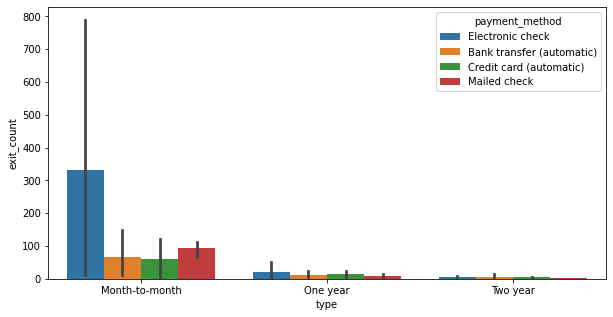

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=agg_exit_count, hue='payment_method',x='type',y='exit_count')
plt.show()

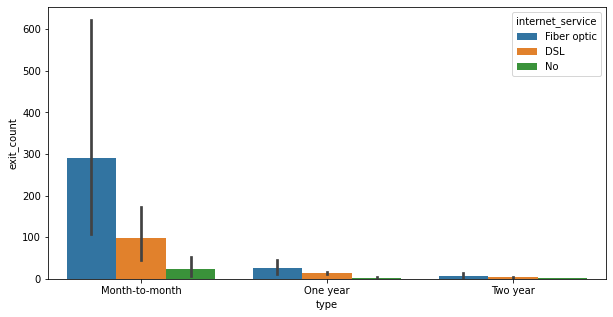

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=agg_exit_count, hue='internet_service',x='type',y='exit_count')
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
The two graphs show that the most user exits are type month to month, the payment method is electronic check, and the internet service is fiber optic. 
We will find out whether there are factors in the total charges or monthly charges that affect users exit

</div>

In [51]:
# Group type
groupby_type_tcharge = df_exit_user.groupby(['type'])['total_charges'].mean().reset_index().sort_values(by='total_charges', ascending = False)

# Group payment method
groupby_method_tcharge = df_exit_user.groupby(['payment_method'])['total_charges'].mean().reset_index().sort_values(by='total_charges', ascending = False)

# Group internet service
groupby_internet_tcharge = df_exit_user.groupby(['internet_service'])['total_charges'].mean().reset_index().sort_values(by='total_charges', ascending = False)

#groupby_internet_tcharge

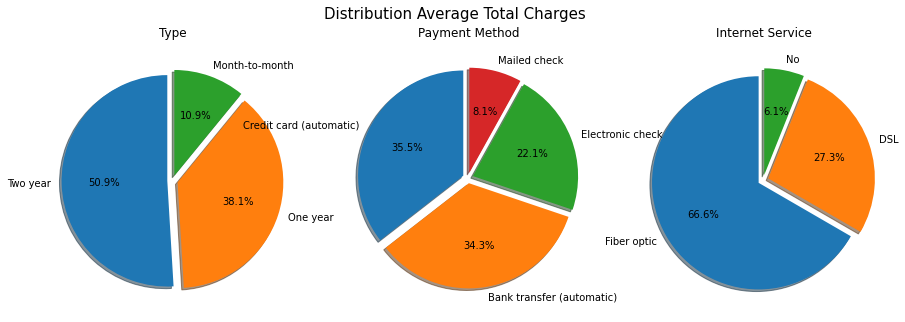

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

fig.suptitle('Distribution Average Total Charges', fontsize=15)

#Type
labels = groupby_type_tcharge['type']
sizes = groupby_type_tcharge['total_charges']
explode = (0.05, 0.05, 0.05)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Type');

#Payment Method
labels = groupby_method_tcharge['payment_method']
sizes = groupby_method_tcharge['total_charges']
explode = (0.05, 0.05, 0.05, 0.05)

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Payment Method');

#Type
labels = groupby_internet_tcharge['internet_service']
sizes = groupby_internet_tcharge['total_charges']
explode = (0.05, 0.05, 0.05)

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Internet Service');

In [53]:
# Group type
groupby_type_mcharge = df_exit_user.groupby(['type'])['monthly_charges'].mean().reset_index().sort_values(by='monthly_charges', ascending = False)

# Group payment method
groupby_method_mcharge = df_exit_user.groupby(['payment_method'])['monthly_charges'].mean().reset_index().sort_values(by='monthly_charges', ascending = False)

# Group internet service
groupby_internet_mcharge = df_exit_user.groupby(['internet_service'])['monthly_charges'].mean().reset_index().sort_values(by='monthly_charges', ascending = False)
#
groupby_internet_mcharge

,internet_service,monthly_charges
1,Fiber optic,88.126484
0,DSL,49.083224
2,No,20.368142


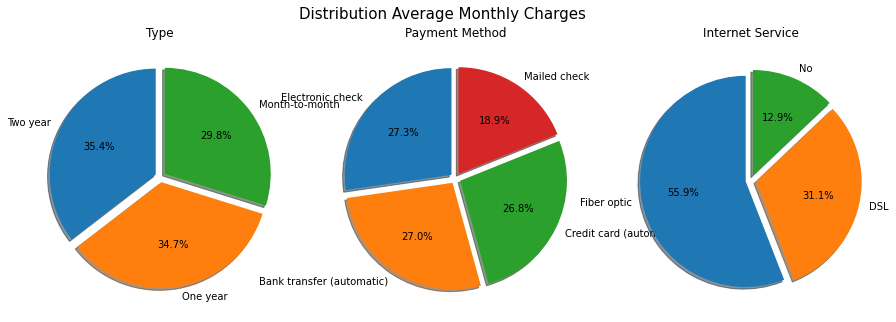

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

fig.suptitle('Distribution Average Monthly Charges', fontsize=15)

#Type
labels = groupby_type_mcharge['type']
sizes = groupby_type_mcharge['monthly_charges']
explode = (0.05, 0.05, 0.05)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Type');

#Payment Method
labels = groupby_method_mcharge['payment_method']
sizes = groupby_method_mcharge['monthly_charges']
explode = (0.05, 0.05, 0.05, 0.05)

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Payment Method');

#Type
labels = groupby_internet_mcharge['internet_service']
sizes = groupby_internet_mcharge['monthly_charges']
explode = (0.05, 0.05, 0.05)

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Internet Service');

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
It can be seen from the piechart above that the average distribution of total charges and monthly charges is similar.

- Charge from the month to month type has the least distribution, maybe this is not a factor for users exit.
- Charges from electronic check payment methods and bank transfers are almost the same in distribution. Both can affect users exit or not.
- Charges from the internet service Fiber Optic has the highest distribution, maybe this is the factor that affects users exit.

</div>

Check with the correlation matrix

In [55]:
# function to plot correlation matrix for used car data
def corr_matrix(df, label):
    plt.figure(figsize=(10,5))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix for ' + label)
    plt.show()

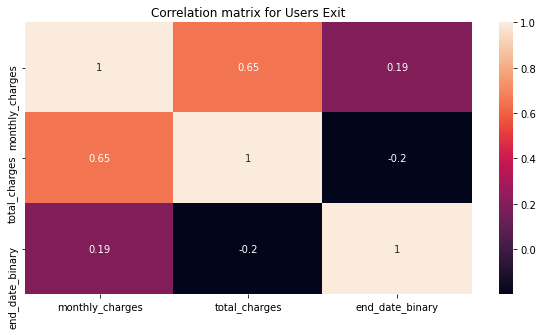

In [56]:
df_corr = df_merge[['monthly_charges', 'total_charges', 'end_date_binary', 'type', 'payment_method', 'internet_service']]
corr_matrix(df_corr, 'Users Exit')

<div style="background-color:rgba(0, 255, 172, 0.07)"

However, from the correlation matrix, the effect of total charge and monthly charge with users exit is not too significant. 
Type, payment method and internet service on the correlation matrix have not yet appeared because the encoder has not been done
     
<div style="background-color:rgba(0, 255, 172, 0.07)"

# 3.5 EDA Conclusion <a id='eda_conclusion'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"

Summary Conclusion from EDA :
- The total charge from user exits with male gender is more than female gender
- The total charge from user exits in october and December is more than in other months
- The most user exits are type month to month, the payment method is electronic check, and the internet service is fiber optic
- Charges from the internet service Fiber Optic has the highest distribution, maybe this is the factor that affects users exit 

Reccomendation :
- Interconnect marketing team should more approach male gender to prevent user exit
- Targeted marketing campaigns and promotional events on October and December, and customer with contract type month to month
- Reduce customer cost for electronic check and internet service fiber optic
- Find out if there is technincal problem with electronic check payment method, internet service with fiber optic

     
<div style="background-color:rgba(0, 255, 172, 0.07)"

# 4. Features Engineering <a id='features_engineer'></a>

In [57]:
pd.set_option('display.max_columns', 100)

In [58]:
df_merge.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,end_date_binary,end_date_month,end_date_year
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,Female,0,1,0,0,0,nan,nan
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,DSL,1,0,1,0,0,0,Male,0,0,0,0,0,nan,nan
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,Male,0,0,0,0,1,12.0,2019.0
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,Male,0,0,0,0,0,nan,nan
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,Female,0,0,0,0,1,11.0,2019.0


In [59]:
# Create a copy of the dataframe to not alter the original
df_preprocessed = df_merge.copy()

In [60]:
# drop unimportant features
df_preprocessed = df_preprocessed.drop(['customer_id', 'begin_date', 'end_date', 'end_date_month', 'end_date_year'], axis=1)

In [61]:
#Encoder
oe = OrdinalEncoder()
categorical_features = ['type', 'internet_service', 'gender', 'payment_method' ]
for feature in categorical_features:
  df_preprocessed[feature] = oe.fit_transform(df_merge[[feature]])


#df_preprocessed = pd.get_dummies(df_preprocessed, drop_first=True)

In [62]:
df_preprocessed

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,end_date_binary
0,0.0,1,2.0,29.85,29.85,0.0,0,1,0,0,0,0,0.0,0,1,0,0,0
1,1.0,0,3.0,56.95,1889.50,0.0,1,0,1,0,0,0,1.0,0,0,0,0,0
2,0.0,1,3.0,53.85,108.15,0.0,1,1,0,0,0,0,1.0,0,0,0,0,1
3,1.0,0,0.0,42.30,1840.75,0.0,1,0,1,1,0,0,1.0,0,0,0,0,0
4,0.0,1,2.0,70.70,151.65,1.0,0,0,0,0,0,0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1,3.0,84.80,1990.50,0.0,1,0,1,1,1,1,1.0,0,1,1,1,0
7039,1.0,1,1.0,103.20,7362.90,1.0,0,1,1,0,1,1,0.0,0,1,1,1,0
7040,0.0,1,2.0,29.60,346.45,0.0,1,0,0,0,0,0,0.0,0,1,1,0,0
7041,0.0,1,3.0,74.40,306.60,1.0,0,0,0,0,0,0,1.0,1,1,0,1,1


In [63]:
# rename end_date_binary
df_preprocessed = df_preprocessed.rename(columns = {'end_date_binary':'users_exit'})

# Conclusion

<div style="background-color:rgba(0, 255, 172, 0.07)"

After the encoder is done, there is a strong negative on Exit User with Internet Service.
     
</div>

# 5. Evaluation Procedure Engineering <a id='evaluate_procedure'></a>

In [64]:
##Composing an evaluation routine which can be used for all models in this project

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    #fig, ax = plt.subplots(figsize=(10, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        
        #if type == 'train':
        #    color = 'blue'
        #else:
        #    color = 'green'

        ## ROC
        #ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        ## setting crosses for some thresholds
        #for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
        #    closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
        #    marker_color = 'orange' if threshold != 0.5 else 'red'            
        #    ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        #ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        #ax.set_xlim([-0.02, 1.02])    
        #ax.set_ylim([-0.02, 1.02])
        #ax.set_xlabel('FPR')
        #ax.set_ylabel('TPR')
        #ax.legend(loc='lower center')        
        #ax.set_title(f'ROC Curve')
       # 
        
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return df_eval_stats

# 6. Define Target, Data Split and Scaller  <a id='data_split'></a>

In [65]:
df_preprocessed.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,users_exit
0,0.0,1,2.0,29.85,29.85,0.0,0,1,0,0,0,0,0.0,0,1,0,0,0
1,1.0,0,3.0,56.95,1889.50,0.0,1,0,1,0,0,0,1.0,0,0,0,0,0
2,0.0,1,3.0,53.85,108.15,0.0,1,1,0,0,0,0,1.0,0,0,0,0,1
3,1.0,0,0.0,42.30,1840.75,0.0,1,0,1,1,0,0,1.0,0,0,0,0,0
4,0.0,1,2.0,70.70,151.65,1.0,0,0,0,0,0,0,0.0,0,0,0,0,1


In [66]:
# split data into 75% training and 25% testing sets
x = df_preprocessed.drop(["users_exit"], axis=1)
y = df_preprocessed["users_exit"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)

In [67]:
# transform the training set and the test set using transform()
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [68]:
x_train_std.shape, x_test_std.shape

((5282, 17), (1761, 17))

In [69]:
x_test_std

array([[-0.8354164 ,  0.82172376,  0.40726169, ..., -0.9668498 ,
        -0.65034805, -0.8587782 ],
       [-0.8354164 ,  0.82172376,  0.40726169, ...,  1.03428682,
        -0.65034805,  1.16444502],
       [-0.8354164 ,  0.82172376,  0.40726169, ..., -0.9668498 ,
         1.53763819, -0.8587782 ],
       ...,
       [ 0.36661831,  0.82172376, -0.52721105, ...,  1.03428682,
         1.53763819,  1.16444502],
       [ 1.56865303,  0.82172376, -1.46168379, ...,  1.03428682,
         1.53763819,  1.16444502],
       [ 1.56865303,  0.82172376,  1.34173443, ..., -0.9668498 ,
        -0.65034805, -0.8587782 ]])

In [70]:
y_train

845     0
6386    0
1194    0
5787    1
3585    0
       ..
3497    0
3492    0
2177    0
3557    0
4578    0
Name: users_exit, Length: 5282, dtype: int64

# 7. Model Building <a id='model_building'></a>

# 7.1 Baseline Model <a id='baseline_model'></a>

In [71]:
%%time
base_model = DummyClassifier(strategy='constant', constant=1, random_state=12345)
base_model.fit(x_train_std, y_train)

base_result = evaluate_model(base_model, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy   0.26  0.27
ROC AUC    0.50  0.50
CPU times: user 12.4 ms, sys: 4.75 ms, total: 17.2 ms
Wall time: 50.5 ms


In [72]:
baseline_acc = base_result['test']['Accuracy']
baseline_roc_acc = base_result['test']['ROC AUC']

# 7.2 Logistic Regression Model <a id='lr_model'></a>

0    0.779671
1    0.220329
dtype: float64

Accuracy score before upsampling: 0.794
          train  test
Accuracy   0.80  0.79
ROC AUC    0.84  0.83
CPU times: user 94.8 ms, sys: 143 ms, total: 238 ms
Wall time: 207 ms


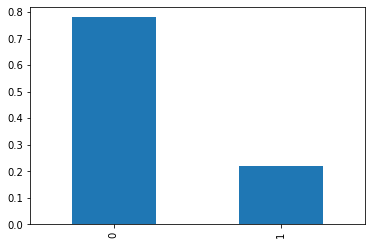

In [73]:
%%time
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(x_train_std, y_train)
test_predictions = pd.Series(lr_model.predict(x_test_std))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score before upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

lr_result = evaluate_model(lr_model, x_train_std, y_train, x_test_std, y_test)

In [74]:
lr_acc = lr_result['test']['Accuracy']
lr_roc_acc = lr_result['test']['ROC AUC']

# 7.3 Logistic Regression Model + Upsampling <a id='lr_model_upsampling'></a>

In [75]:
x_train_std2 = pd.DataFrame(x_train_std, columns = x_train.columns ,index=x_train.index)

In [76]:
#x_train.dtypes

In [77]:
# function to perform upsampling 

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# new training set created
features_upsampled, target_upsampled = upsample(
    x_train_std2, y_train, 4
)

1    0.500284
0    0.499716
dtype: float64

Accuracy score after upsampling: 0.691
          train  test
Accuracy   0.77  0.69
ROC AUC    0.84  0.83
CPU times: user 132 ms, sys: 226 ms, total: 358 ms
Wall time: 347 ms


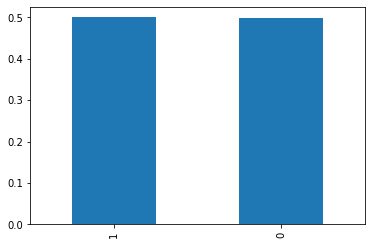

In [78]:
%%time
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_upsampled, target_upsampled)
test_predictions = pd.Series(lr_model.predict(x_test_std))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score after upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

#lr_result = evaluate_model(lr_model, x_train_std, y_train, x_test_std, y_test)
lr_result = evaluate_model(lr_model, features_upsampled, target_upsampled, x_test_std, y_test)

# 7.4 Logistic Regression Model + Downsampling <a id='lr_model_downsampling'></a>

In [79]:
# function to perform downsampling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    x_train_std2, y_train, 0.2
)

1    0.526405
0    0.473595
dtype: float64

Accuracy score after downsampling: 0.672
          train  test
Accuracy   0.78  0.67
ROC AUC    0.83  0.83
CPU times: user 83.5 ms, sys: 115 ms, total: 199 ms
Wall time: 192 ms


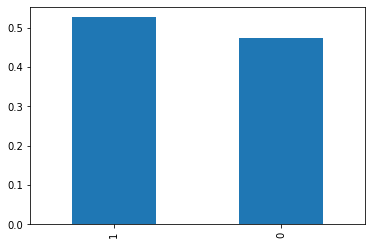

In [80]:
%%time
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(features_downsampled, target_downsampled)
test_predictions = pd.Series(lr_model.predict(x_test_std))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score after downsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

#lr_result = evaluate_model(lr_model, x_train_std, y_train, x_test_std, y_test)
lr_result = evaluate_model(lr_model, features_downsampled, target_downsampled, x_test_std, y_test)

# 7.5 Random Forest Classifier <a id='rf_classifier'></a>

In [81]:
%%time
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(x_train_std, y_train)

rf_result = evaluate_model(rf_model, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy    1.0  0.78
ROC AUC     1.0  0.82
CPU times: user 991 ms, sys: 8.89 ms, total: 1 s
Wall time: 1.01 s


In [82]:
rf_acc = rf_result['test']['Accuracy']
rf_roc_acc = rf_result['test']['ROC AUC']

# 7.5.1 Random Forest Classifier + Hyperparameter Tuning <a id='rf_classifier'></a>

In [83]:
%%time
rf_tuning = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, n_estimators=50)
rf_tuning.fit(x_train_std, y_train)

rf_tuning_result = evaluate_model(rf_tuning, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy   0.87  0.79
ROC AUC    0.94  0.84
CPU times: user 477 ms, sys: 3.42 ms, total: 481 ms
Wall time: 496 ms


# 7.5.2 Random Forest Classifier + Upsample <a id='rf_classifier'></a>

In [84]:
%%time
rf_upsample = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, n_estimators=50)
rf_upsample.fit(features_upsampled, target_upsampled)

rf_upsample_result = evaluate_model(rf_upsample, features_upsampled, target_upsampled, x_test_std, y_test)

          train  test
Accuracy   0.90  0.73
ROC AUC    0.95  0.84
CPU times: user 640 ms, sys: 2.24 ms, total: 643 ms
Wall time: 652 ms


# 7.5.3 Random Forest Classifier + Downsample <a id='rf_classifier'></a>

In [85]:
%%time
rf_downsample = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, n_estimators=50)
rf_downsample.fit(features_downsampled, target_downsampled)

rf_downsample_result = evaluate_model(rf_downsample, features_downsampled, target_downsampled, x_test_std, y_test)

          train  test
Accuracy   0.90  0.66
ROC AUC    0.96  0.83
CPU times: user 254 ms, sys: 2.43 ms, total: 256 ms
Wall time: 264 ms


# 7.6 XGBoost Classifier <a id='xgb_classifier'></a>

In [86]:
%%time
xgb_model = XGBClassifier(random_state=12345)
xgb_model.fit(x_train_std, y_train)

xgb_result = evaluate_model(xgb_model, x_train_std, y_train, x_test_std, y_test)

[07:33:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


          train  test
Accuracy   0.93  0.77
ROC AUC    0.98  0.81
CPU times: user 3.49 s, sys: 22.6 ms, total: 3.51 s
Wall time: 3.53 s


In [87]:
xgb_acc = xgb_result['test']['Accuracy']
xgb_roc_acc = xgb_result['test']['ROC AUC']

# 7.6.1 XGBoost Classifier + Hyperparameter Tuning <a id='xgb_classifier'></a>

In [88]:
%%time
xgb_tuning = XGBClassifier(learning_rate=0.1, n_estimators= 500, max_depth=5)
xgb_tuning.fit(x_train_std, y_train)

xgb_result = evaluate_model(xgb_tuning, x_train_std, y_train, x_test_std, y_test)

[07:33:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


          train  test
Accuracy   0.94  0.77
ROC AUC    0.98  0.82
CPU times: user 17.2 s, sys: 174 ms, total: 17.4 s
Wall time: 17.6 s


# 7.6.2 XGBoost Classifier + Upsample <a id='xgb_classifier'></a>

In [89]:
%%time
xgb_upsample = XGBClassifier(learning_rate=0.1, n_estimators= 500, max_depth=5)
xgb_upsample.fit(features_upsampled, target_upsampled)

xgb_tuning_result = evaluate_model(xgb_upsample, features_upsampled, target_upsampled, x_test_std, y_test)

[07:33:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


          train  test
Accuracy   0.95  0.74
ROC AUC    0.99  0.82
CPU times: user 19.1 s, sys: 110 ms, total: 19.2 s
Wall time: 19.4 s


# 7.6.3 XGBoost Classifier + Downsample <a id='xgb_classifier'></a>

In [90]:
%%time
xgb_downsample = XGBClassifier(learning_rate=0.1, n_estimators= 500, max_depth=5)
xgb_downsample.fit(features_downsampled, target_downsampled)

xgb_downsample_result = evaluate_model(xgb_downsample, features_downsampled, target_downsampled, x_test_std, y_test)

[07:33:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


          train  test
Accuracy   0.98  0.67
ROC AUC    1.00  0.81
CPU times: user 8.95 s, sys: 102 ms, total: 9.06 s
Wall time: 9.11 s


# 7.7 LGBM Classifier <a id='lgbm_classifier'></a>

In [91]:
%%time
lgbm_model = LGBMClassifier(random_state=12345)
lgbm_model.fit(x_train_std, y_train)

lgbm_result = evaluate_model(lgbm_model, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy   0.88  0.79
ROC AUC    0.95  0.83
CPU times: user 1.58 s, sys: 11.2 ms, total: 1.59 s
Wall time: 1.59 s


In [92]:
lgbm_acc = lgbm_result['test']['Accuracy']
lgbm_roc_acc = lgbm_result['test']['ROC AUC']

# 7.7.1 LGBM Classifier + Hperparameter Tuning <a id='lgbm_classifier'></a>

In [93]:
%%time
lgbm_tuning = LGBMClassifier(learning_rate=0.1, n_estimators= 500, num_leaves=5)
lgbm_tuning.fit(x_train_std, y_train)

lgbm_tuning_result = evaluate_model(lgbm_tuning, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy   0.85  0.79
ROC AUC    0.91  0.83
CPU times: user 1.05 s, sys: 6.03 ms, total: 1.05 s
Wall time: 1.11 s


# 7.7.2 LGBM Classifier + Upsample <a id='lgbm_classifier'></a>

In [94]:
%%time
lgbm_upsample = LGBMClassifier(learning_rate=0.1, n_estimators= 500, num_leaves=5)
lgbm_upsample.fit(features_upsampled, target_upsampled)

lgbm_upsample_result = evaluate_model(lgbm_upsample, features_upsampled, target_upsampled, x_test_std, y_test)

          train  test
Accuracy   0.85  0.72
ROC AUC    0.91  0.83
CPU times: user 2.45 s, sys: 25.1 ms, total: 2.48 s
Wall time: 2.69 s


# 7.7.3 LGBM Classifier + Downsample <a id='lgbm_classifier'></a>

In [95]:
%%time
lgbm_downsample = LGBMClassifier(learning_rate=0.1, n_estimators= 500, num_leaves=5)
lgbm_downsample.fit(features_downsampled, target_downsampled)

lgbm_result = evaluate_model(lgbm_downsample, features_downsampled, target_downsampled, x_test_std, y_test)

          train  test
Accuracy   0.87  0.68
ROC AUC    0.93  0.82
CPU times: user 846 ms, sys: 991 µs, total: 847 ms
Wall time: 823 ms


# 7.8 Catboost Classifier <a id='catboost_classifier'></a>

In [96]:
%%time
cb_model = CatBoostClassifier(random_state=12345, verbose=0)
cb_model.fit(x_train_std, y_train)

cb_result = evaluate_model(cb_model, x_train_std, y_train, x_test_std, y_test)

          train  test
Accuracy   0.88  0.79
ROC AUC    0.94  0.83
CPU times: user 2.73 s, sys: 14.8 ms, total: 2.74 s
Wall time: 3.04 s


# 7.8.1 Catboost Classifier + Tuning Hyperparameter <a id='catboost_classifier'></a>

In [97]:
%%time
cb_tuning_model = CatBoostClassifier(learning_rate=0.2, l2_leaf_reg=5, depth=5, loss_function='Logloss',
                        random_seed=42)
cb_tuning_model.fit(x_train_std, y_train)

cb_tuning_result = evaluate_model(cb_tuning_model, x_train_std, y_train, x_test_std, y_test)

0:	learn: 0.5808653	total: 2.65ms	remaining: 2.65s
1:	learn: 0.5210392	total: 5.46ms	remaining: 2.72s
2:	learn: 0.4814323	total: 7.49ms	remaining: 2.49s
3:	learn: 0.4587762	total: 9.51ms	remaining: 2.37s
4:	learn: 0.4457244	total: 11.4ms	remaining: 2.26s
5:	learn: 0.4335018	total: 13.6ms	remaining: 2.25s
6:	learn: 0.4270047	total: 15.4ms	remaining: 2.18s
7:	learn: 0.4202510	total: 17.5ms	remaining: 2.17s
8:	learn: 0.4153263	total: 19.5ms	remaining: 2.14s
9:	learn: 0.4114993	total: 21.5ms	remaining: 2.13s
10:	learn: 0.4094096	total: 23.4ms	remaining: 2.1s
11:	learn: 0.4062918	total: 25.5ms	remaining: 2.1s
12:	learn: 0.4042953	total: 27.5ms	remaining: 2.09s
13:	learn: 0.4029140	total: 29.6ms	remaining: 2.08s
14:	learn: 0.4014033	total: 31.6ms	remaining: 2.08s
15:	learn: 0.3995053	total: 33.9ms	remaining: 2.08s
16:	learn: 0.3983187	total: 36.1ms	remaining: 2.08s
17:	learn: 0.3967547	total: 38.1ms	remaining: 2.08s
18:	learn: 0.3956407	total: 40.2ms	remaining: 2.08s
19:	learn: 0.3947627	tot

# 7.8.2 Catboost Classifier + Upsample <a id='catboost_classifier'></a>

In [98]:
%%time
cb_tuning_upsample = CatBoostClassifier(random_state=12345, verbose=0)
cb_tuning_upsample.fit(features_upsampled, target_upsampled)

cb_tuning_upsample = evaluate_model(cb_tuning_upsample, features_upsampled, target_upsampled, x_test_std, y_test)

          train  test
Accuracy   0.91  0.73
ROC AUC    0.96  0.83
CPU times: user 3.68 s, sys: 38.8 ms, total: 3.72 s
Wall time: 3.83 s


# 7.8.3 Catboost Classifier + Downsample <a id='catboost_classifier'></a>

In [99]:
%%time
cb_tuning_downsample = CatBoostClassifier(random_state=12345, verbose=0)
cb_tuning_downsample.fit(features_downsampled, target_downsampled)

cb_tuning_downsample = evaluate_model(cb_tuning_downsample, features_downsampled, target_downsampled, x_test_std, y_test)

          train  test
Accuracy   0.89  0.68
ROC AUC    0.95  0.83
CPU times: user 1.95 s, sys: 9.54 ms, total: 1.96 s
Wall time: 2.07 s


# 8. Model Summary <a id='model_summary'></a>

In [123]:
model = ['Dummy Classifier', 'LR', 'LR + Upsample', 'LR + Downsample', 'RF', 'RF + Tuning', 'RF + Upsample', 'RF + Downsample', 'XGB', 'XGB + Tuning', 'XGB + Upsample', 'XGB + Downsample', 'LGBM', 'LGBM + Tuning', 'LGBM + Upsample', 'LGBM + Downsample', 'Catboost', 'Catboost + Tuning','Catboost + Upsample', 'Catboost + Downsample' ]
accuracy_train = ['26%', '80%', '77%', '78%', '100%', '87%', '90%', '90%', '93%', '94%', '95%', '98%', '88%', '85%', '85%', '87%', '88%', '98%', '91%', '89%']                                                                                                                                                                                                  
accuracy_test = ['27%',  '79%', '69%', '67%', '78%', '79%', '73%', '66%', '77%', '77%', '74%', '67%', '79%', '79%', '72%', '68%', '79%', '77%', '73%', '68%']
auc_roc_train = ['50%', '84%', '84%', '83%', '100%', '94%', '95%', '96%', '98%', '98%', '99%', '100%', '95%', '91%', '91%', '93%', '94%', '100%', '96%', '95%']
auc_roc_test = ['50%', '83%', '83%', '83%', '82%', '84%', '84%', '83%', '81%', '82%', '82%', '81%', '83%', '83%', '83%', '82%', '83%', '80%', '83%', '83%']
total_time = ['50.5 ms', '207 ms', '347 ms','192 ms', '1.01 ms', '496 ms', '652 ms', '264 ms', '3.53 s', '17.6 s', '19.4 s', '9.11', '1.59 s', '1.11', '2.69 s', '823 ms', '3.04 s', '2.68 s', '3.83 s', '2.07 s']

In [124]:
data_model = {'model':model, 'accuracy_train':accuracy_train, 'accuracy_test':accuracy_test, 'auc_roc_train':auc_roc_train, 'auc_roc_test':auc_roc_test, 'total_time':total_time}
df_model = pd.DataFrame(data=data_model)
df_model

,model,accuracy_train,accuracy_test,auc_roc_train,auc_roc_test,total_time
0,Dummy Classifier,26%,27%,50%,50%,50.5 ms
1,LR,80%,79%,84%,83%,207 ms
2,LR + Upsample,77%,69%,84%,83%,347 ms
3,LR + Downsample,78%,67%,83%,83%,192 ms
4,RF,100%,78%,100%,82%,1.01 ms
5,RF + Tuning,87%,79%,94%,84%,496 ms
6,RF + Upsample,90%,73%,95%,84%,652 ms
7,RF + Downsample,90%,66%,96%,83%,264 ms
8,XGB,93%,77%,98%,81%,3.53 s
9,XGB + Tuning,94%,77%,98%,82%,17.6 s


# 9. General Conclusion <a id='general_conclusion'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
The goal of this project is to predict customer churn. So we need to build a binary classification model.
We are given four different datasets. We looked into the general information about the dataset. We checked for missing values and duplicates. We observed that there are no missing values. We merged the dataset and procedded to change datatype. We carried out exploratory data analysis and found out that:
     
- The total charge from user exits with male gender is more than female gender
- The total charge from user exits in october and december is more than in other months
- The most user exits are type month to month, the payment method is electronic check, and the internet service is fiber optic
- Charges from the internet service Fiber Optic has the highest distribution, maybe this is the factor that affects users exit 
     
Reccomendation :
- Interconnect marketing team should more approach male gender to prevent user exit
- Targeted marketing campaigns and promotional events on October and December, and customer with contract type month to month
- Reduce customer cost for electronic check and internet service fiber optic
- Find out if there is technincal problem with electronic check payment method, internet service with fiber optic
     

After that, we build the model by previously doing Data Merging, Data Splitting, Feature Engineering, and standard scaling.
     
To determine the best model based on accuracy_test and AUC-ROC, we can consider the highest values for both metrics. From the given information, the models with the highest accuracy_test are:

- LR: 79%
- RF + Tuning: 79%
- LGBM: 79%
- LGBM + Tuning: 79%
- Catboost: 79%
- Catboost + Tuning: 77%
Among these models, LR, RF + Tuning, LGBM, LGBM + Tuning, and Catboost achieve the highest accuracy_test score of 79%.

Regarding the AUC-ROC metric, the models with the highest AUC-ROC scores are:

- RF + Tuning: 84%
- LGBM: 83%
- Catboost: 83%
- LGBM + Tuning: 83%
- Catboost + Upsample: 83%
- Among these models, RF + Tuning achieves the highest AUC-ROC score of 84%.

Based on the accuracy_test metric, LR, RF + Tuning, LGBM, LGBM + Tuning, and Catboost perform equally well with an accuracy of 79%. However, when considering the AUC-ROC metric, RF + Tuning has the highest score of 84%.

Therefore, if both accuracy_test and AUC-ROC are important, the RF + Tuning model would be the best choice.
     
</div>